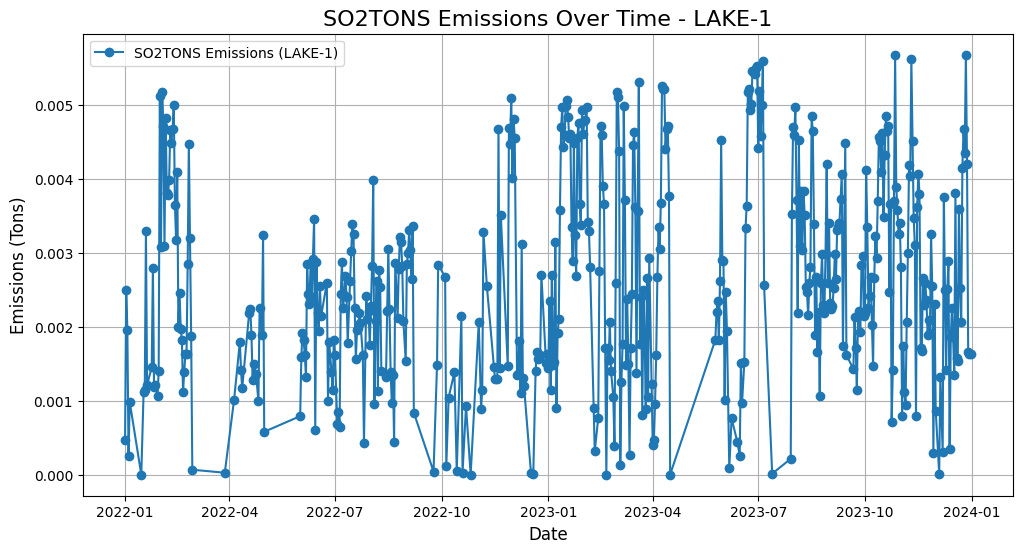

Graph for SO2TONS - LAKE-1 displayed.


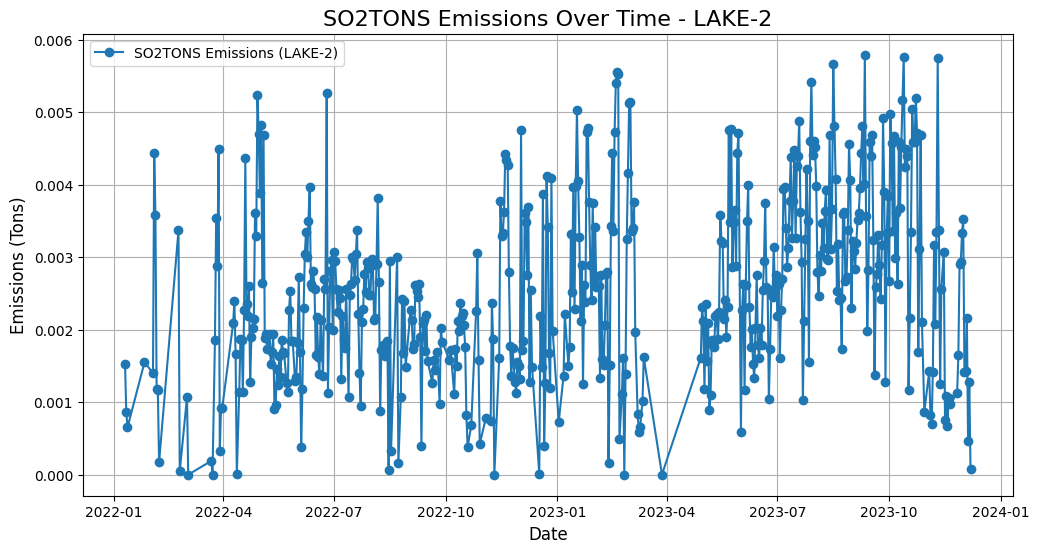

Graph for SO2TONS - LAKE-2 displayed.


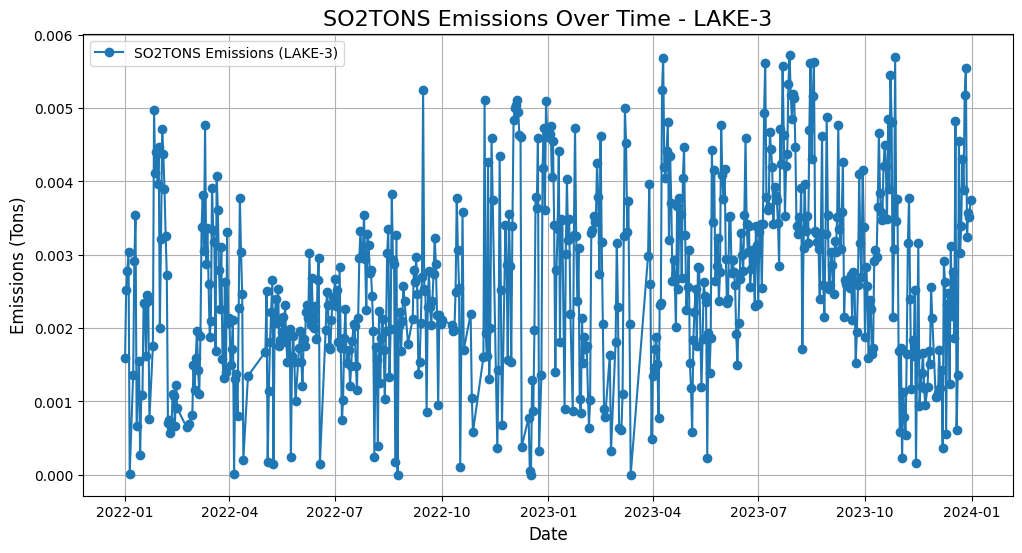

Graph for SO2TONS - LAKE-3 displayed.


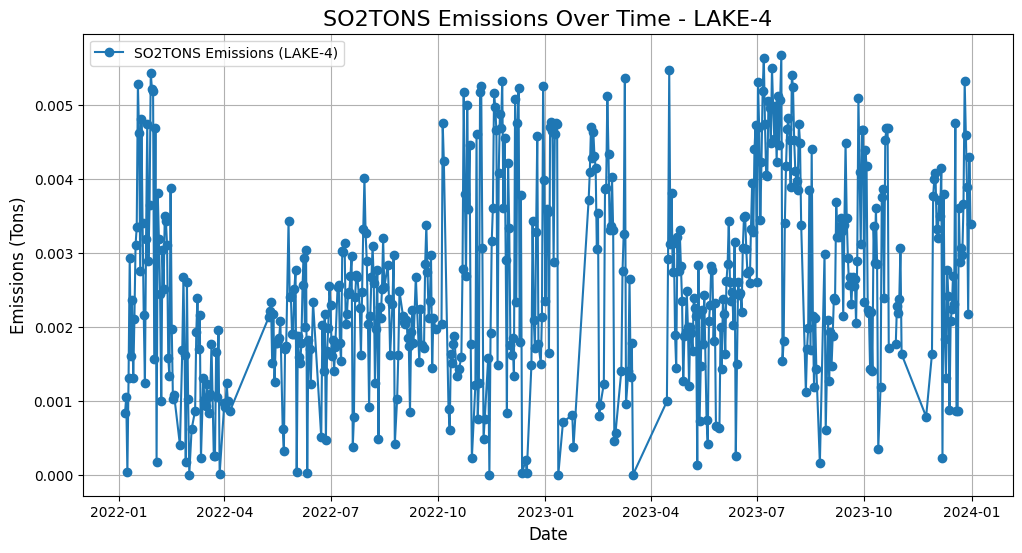

Graph for SO2TONS - LAKE-4 displayed.


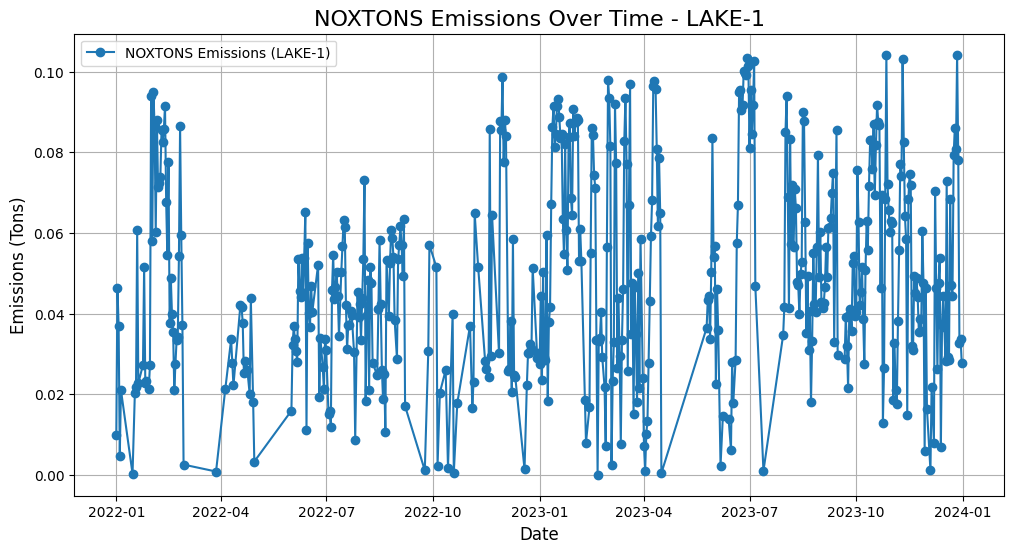

Graph for NOXTONS - LAKE-1 displayed.


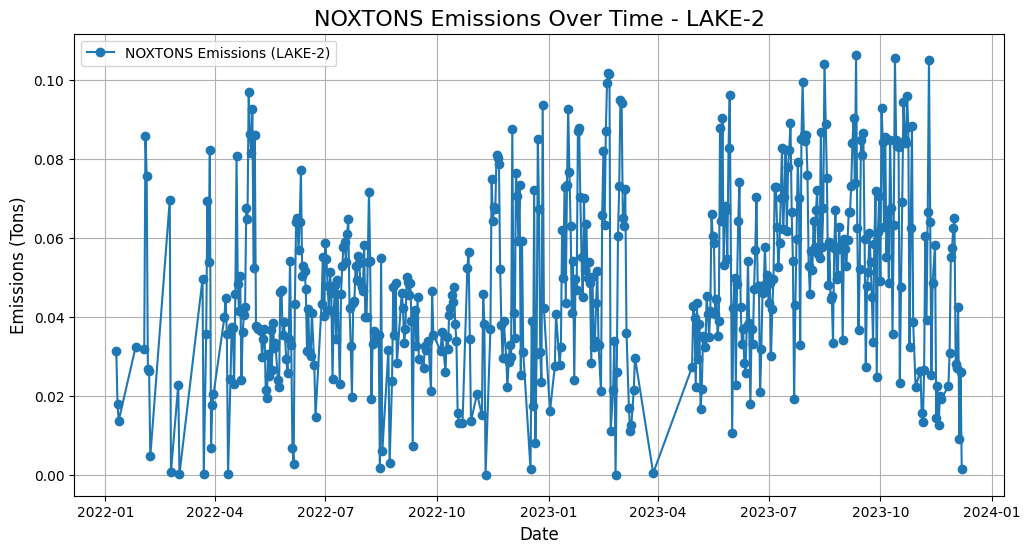

Graph for NOXTONS - LAKE-2 displayed.


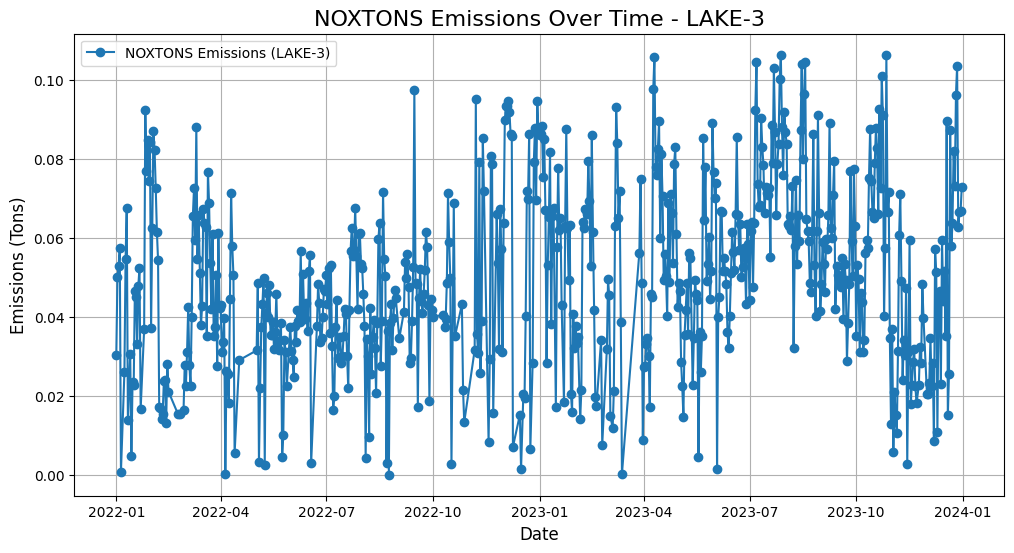

Graph for NOXTONS - LAKE-3 displayed.


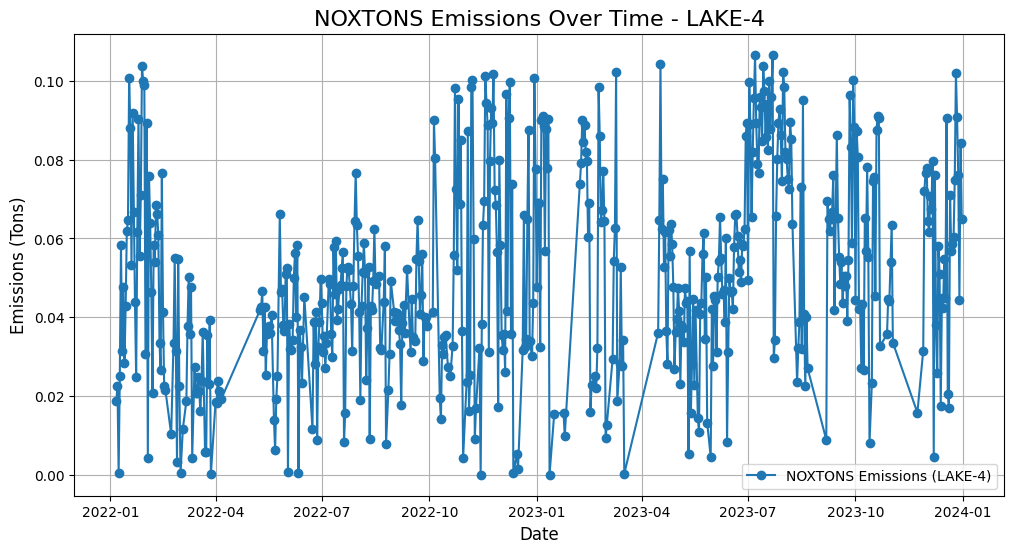

Graph for NOXTONS - LAKE-4 displayed.


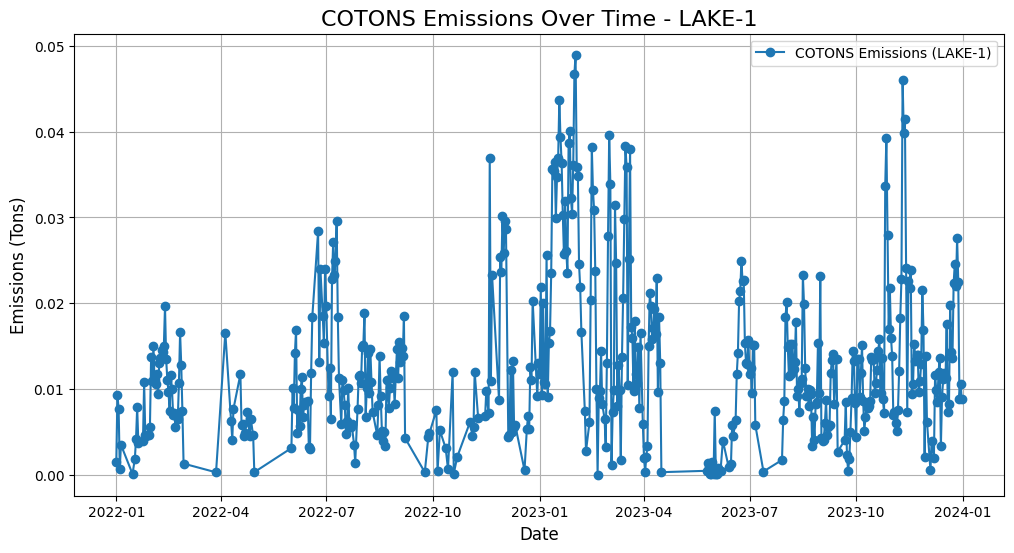

Graph for COTONS - LAKE-1 displayed.


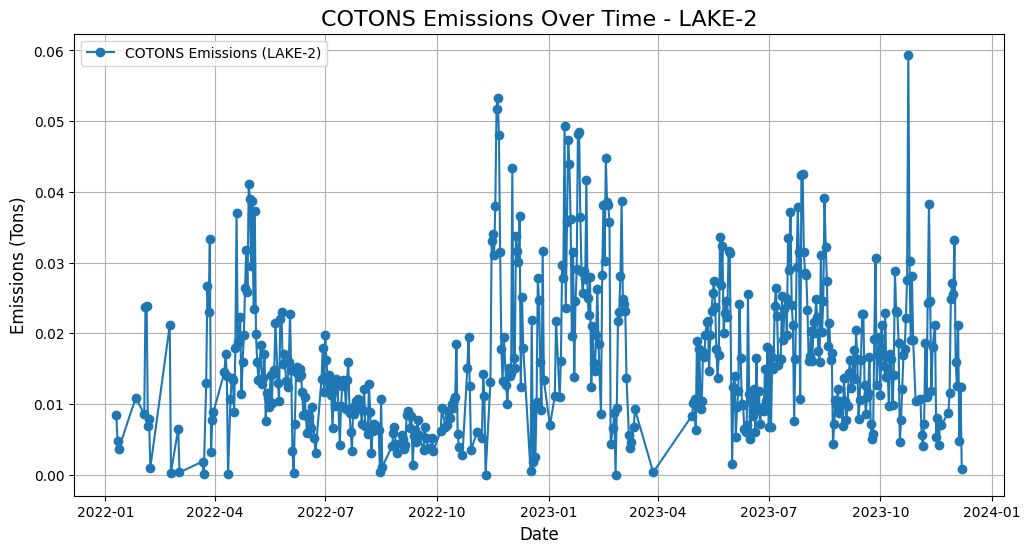

Graph for COTONS - LAKE-2 displayed.


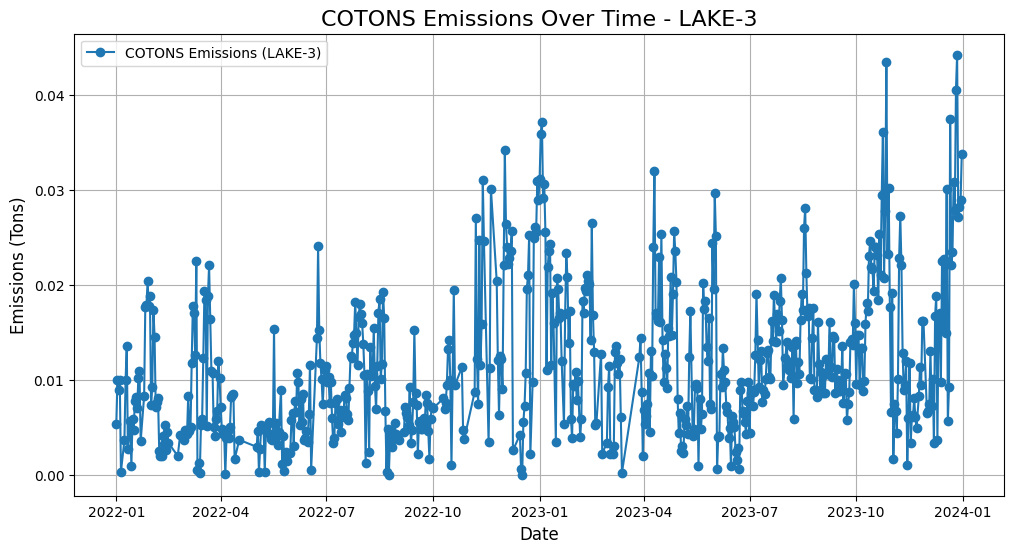

Graph for COTONS - LAKE-3 displayed.


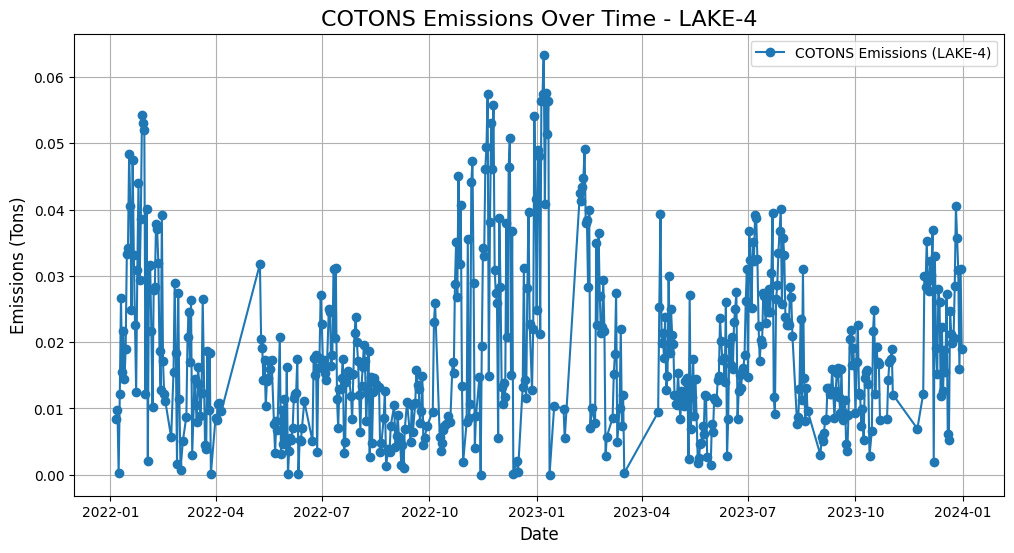

Graph for COTONS - LAKE-4 displayed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define base URL for GitHub files
base_url = "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/"

# Define parameters and sources
parameters = ["SO2TONS", "NOXTONS", "COTONS"]
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Generate URLs for all combinations of parameters and sources
files = [
    (parameter, source, f"{base_url}{parameter}_{source}.csv")
    for parameter in parameters
    for source in sources
]

# Function to generate a graph for each parameter-source combination
def generate_graphs(files):
    for parameter, source, url in files:
        try:
            # Load the data from the URL
            data = pd.read_csv(url)

            # Check if necessary columns exist
            if "date" not in data.columns or "Value" not in data.columns:
                print(f"File {url} does not have the expected columns.")
                continue

            # Ensure the date column is in datetime format
            data['date'] = pd.to_datetime(data['date'])

            # Plot the data
            plt.figure(figsize=(12, 6))
            plt.plot(data['date'], data['Value'], marker='o', label=f'{parameter} Emissions ({source})')
            plt.title(f'{parameter} Emissions Over Time - {source}', fontsize=16)
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Emissions (Tons)', fontsize=12)
            plt.grid(True)
            plt.legend()

            # Display the graph
            plt.show()
            print(f"Graph for {parameter} - {source} displayed.")
        except Exception as e:
            print(f"Could not process file {url}. Error: {e}")

# Generate graphs for all the files
generate_graphs(files)
